# 🧠 Stroke Prediction Dataset

This project explores the "Stroke Prediction Dataset" from Kaggle to understand key risk factors and patterns associated with strokes.

### 🎯 Goals:
- Understand which health and demographic factors are linked to stroke
- Perform feature-wise visual analysis
- Build a predictive model using machine learning

### 📦 Dataset Columns:
- `gender`, `age`, `hypertension`, `heart_disease`
- `ever_married`, `work_type`, `Residence_type`
- `avg_glucose_level`, `bmi`, `smoking_status`, `stroke`

In [3]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Check dataset shape and column types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Unique values in each column
print("\nUnique values:\n", df.nunique())

Shape: (5110, 12)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Unique values:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   41

In [5]:
# Drop the ID column
df = df.drop(columns=['id'])

# Check class distribution of the target
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


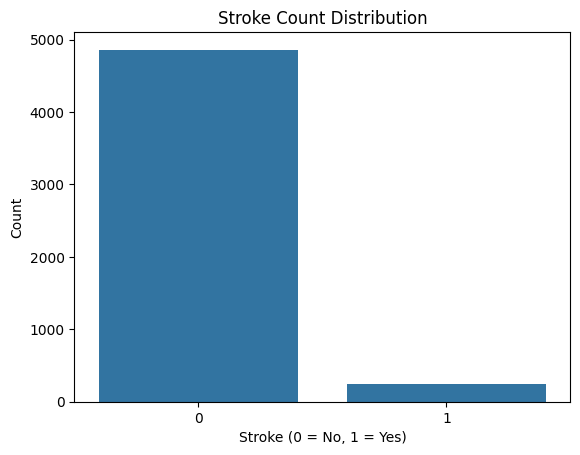

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title("Stroke Count Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.savefig("stroke_distribution.png")  # Saves in current Colab session

plt.show()

### 🧠 Stroke Outcome Distribution & Class Imbalance

The dataset is highly imbalanced in terms of stroke occurrence.

Only **4.87%** of patients had a stroke (`stroke = 1`), while **95.13%** did not (`stroke = 0`).

This is visualized in the bar chart above:

📊 **Class Imbalance Insight:**  
The stroke class is underrepresented, which means a model that always predicts "no stroke" would still be ~95% accurate — but it would completely miss the minority class (stroke patients).  
To address this, we’ll need to:
- Avoid using accuracy as the only evaluation metric
- Monitor **precision**, **recall**, and **F1-score**
- Consider handling imbalance using techniques like:
  - Oversampling (`SMOTE`, `RandomOverSampler`)
  - Undersampling
  - Class weight adjustment in models

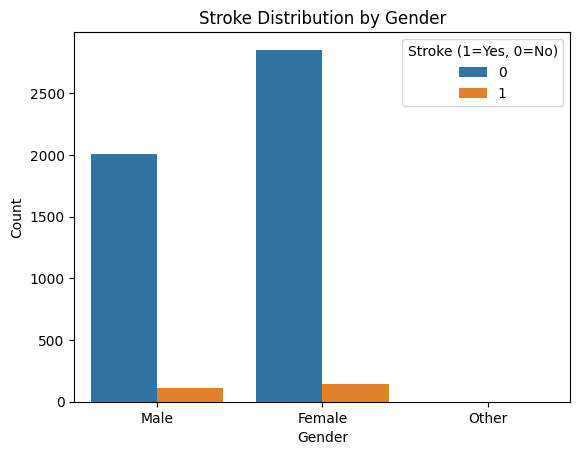

In [8]:


sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke (1=Yes, 0=No)')
plt.show()

### Stroke Distribution by Gender

This chart breaks down stroke occurrences by gender.

- The dataset is skewed toward **female** participants.
- Stroke cases are present in both **male** and **female** groups in similar proportions.
- The **"Other"** gender category has very few records — likely not enough data to infer meaningful patterns.

This suggests gender alone may not be a strong predictor of stroke, but it’s still useful to keep for modeling.

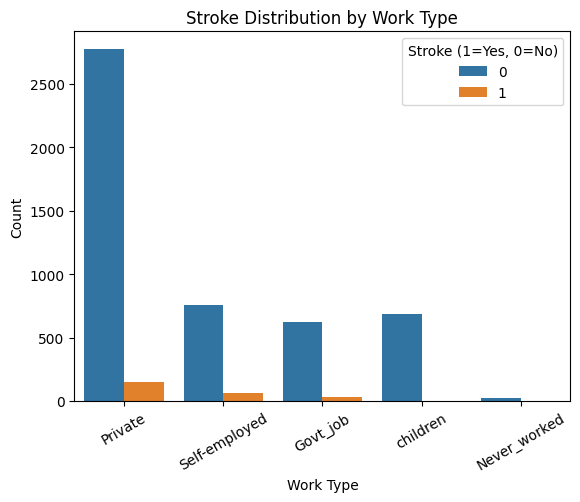

In [10]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Stroke (1=Yes, 0=No)')

plt.savefig("work_type_stroke_distribution.png")  # Saves in current Colab session
plt.show()

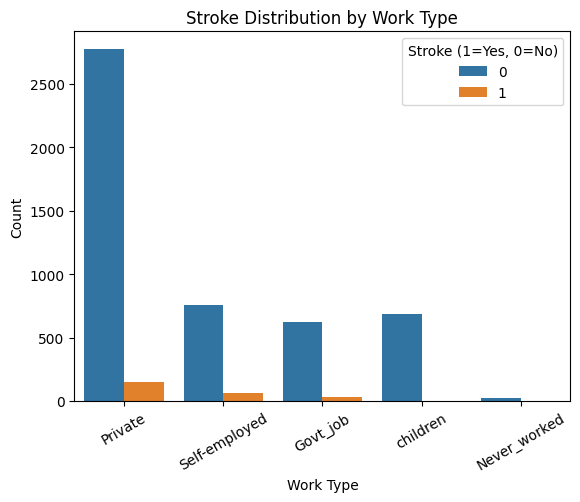

In [12]:
#Stroke distribution by work type

sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Stroke (1=Yes, 0=No)')

plt.savefig("work_type_stroke_distribution.png")  # Saves in current Colab session
plt.show()

### Stroke Distribution by Work Type

The above chart shows how stroke occurrences vary across different work types.

- Most people in the dataset are **Private sector** employees, followed by **Self-employed**.
- The highest proportion of stroke cases appears in the **Self-employed** category.
- Very few strokes are observed among **children** — expected, as they're likely younger.

This insight suggests that work-related lifestyle factors could influence stroke risk.

In [14]:
# Proportion of stroke cases within each work_type
proportion_by_work = df[df['stroke'] == 1]['work_type'].value_counts() / df['work_type'].value_counts()
proportion_by_work = proportion_by_work.sort_values(ascending=False)

print(proportion_by_work)

work_type
Self-employed    0.079365
Private          0.050940
Govt_job         0.050228
children         0.002911
Never_worked          NaN
Name: count, dtype: float64


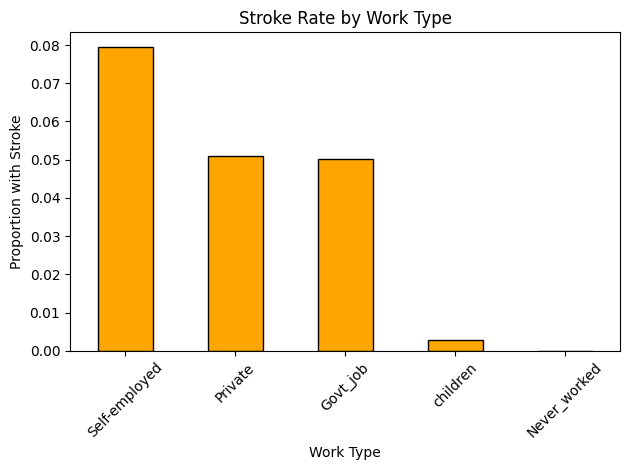

In [15]:
import matplotlib.pyplot as plt

# Plot proportion of stroke cases
proportion_by_work.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Stroke Rate by Work Type")
plt.ylabel("Proportion with Stroke")
plt.xlabel("Work Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Stroke Rate by Work Type

While the absolute number of strokes is highest among people in private jobs (as seen in the count plot), the **stroke *rate*** is highest among the **self-employed** group. This means a larger **proportion** of self-employed people experienced strokes compared to other work types, despite being fewer in number overall.

Understanding proportions helps highlight hidden risks that total counts can miss.


Although the total number of stroke cases is highest among individuals in private jobs (due to their larger population), when adjusting for group size, the **self-employed** have the **highest proportion of stroke cases (~7.9%)**.

This highlights the importance of analyzing proportions instead of just raw counts when exploring risk factors.